<a href="https://colab.research.google.com/github/williamokomba/DSC6-team-Foxtrot-week-10-IP/blob/main/Team_Foxtrot_Week_10_team_Ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moringa Data science core week 6 Independent project: Foxtrot week 10 IP

**Members**
* William Okomba
* Mercy Cheruiyot
* Ruth Nduta Muriithi
* Roy Kimani

##*1.0* Defining the Question

Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

We have been appointed as the Lead Data Analysts to build a predictive model to determine if a building will have an insurance claim during a certain period or not.

**Dataset provided**


* data source [[Data source link]](https://zindi.africa/competitions/data-science-nigeria-2019-challenge-1-insurance-prediction)

**Data grossary**
* **Customer Id**: Identification number for the Policy holder
* **year of observation for the insured policy:** year of observation for the insured policy
* **Insured_Period**: duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5
* **Residential:** is the building a residential building or not
* **Building_Painted**:is the building painted or not (N-Painted, V-Not Painted)
* **Building_Fenced**: is the building fence or not (N-Fenced, V-Not Fenced)
* **Garden**: building has garden or not (V-has garden; O-no garden)
* **Settlement**: Area where the building is located. (R- rural area; U- urban area)
* **Building Dimension:** Size of the insured building in m2
* **Building_Type:** : The type of building (Type 1, 2, 3, 4)
* **Date_of_Occupancy**: date building was first occupied
* **NumberOfWindows**: number of windows in the building
* **Geo Code**:Geographical Code of the Insured building
* **Claim**: Geographical Code of the Insured building



###1.1 Specifying the data analytic 

Our main aim is to determine if a building will have an insurance claim(1) during a certain period or not(0) over insured period of the building.

###1.2 Defining the metric for success

identify the best model with over 75% accuracy to be used to predict on whether the client will claim insurance payout or not.


### 1.3 Understanding the Context

### 1.4 Recording the Experimental 

* upload and read our csv files
* clean our dataset
* perfom EDA
* build our models using
   * Neural Network

* challenge our solution
* Evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem

### 1.5 Assessing the Relevance of the Data

the dataset is relevant since it has all the features related to housing and insurance terms.

## 2.Loading and reading Our Datasets

In [ ]:
# importing the libraries
#
# Importing standard libraries
#
# load pandas
import pandas as pd               # library for data manipulation and analysis
#
# load numpy
import numpy as np                # library for performin scientific computations
#
# load matplotlib.pyplot
import matplotlib.pyplot as plt   # library for creating basic visualisations
#
# load Seaborn
import seaborn as sns             # library for creating rich data visualisations

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the train Datasets
#
train_df= pd.read_csv("/content/insurance_prediction_train_data.csv")

In [ ]:
# Loading the test Datasets
#
test_df=pd.read_csv("/content/prediction_test_data.csv")


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our train and test dataset
#
print("train dataset shape :", train_df.shape)
print("-"*40)
print("test dataset shape :", test_df.shape)

train dataset shape : (7160, 14)
----------------------------------------
test dataset shape : (3069, 13)


**observation**
* train dataset has 7160 records and 14 variables.
* test dataset has 3069 records and 13 variables.

In [ ]:
# Previewing the top of our train dataset
#
train_df.sample(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
5424,H17158,2015,1.000000,0,V,N,O,R,675.0,2,1900.0,3,77350,1
4603,H18151,2015,1.000000,0,V,N,O,R,290.0,1,1960.0,3,73116,0
7042,H17975,2012,1.000000,0,V,N,O,R,850.0,3,1945.0,5,2B033,0
2882,H6780,2013,0.747945,0,V,V,V,U,1362.0,2,1988.0,.,38314,1
1478,H18202,2013,1.000000,1,V,N,O,R,6300.0,2,1973.0,5,13213,0


In [ ]:
# Previewing the bottom of our train dataset
#
train_df.tail(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [ ]:
# Previewing the top of our test dataset
#
test_df.sample(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
2286,H8998,2012,0.751366,0,V,N,O,R,3500.0,4,1900.0,7,75115
2033,H11404,2012,1.000000,1,N,V,V,U,300.0,2,1960.0,.,69381
617,H10121,2013,1.000000,0,V,V,V,U,250.0,2,NaN,.,13202
1771,H11149,2012,1.000000,0,N,V,V,U,5096.0,2,1980.0,.,62160
2059,H9257,2013,1.000000,1,V,N,O,R,725.0,1,1980.0,4,72181


In [ ]:
# Previewing the bottom of our test dataset
#
test_df.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
3064,H11583,2015,1.0,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.0,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.0,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.0,0,V,V,V,U,NaN,1,1800.0,.,NaN
3068,H9021,2012,1.0,0,V,V,V,U,NaN,2,1950.0,.,NaN


observations: both two datasets has uniform data frm top to the bottom

In [ ]:
# Checking whether each column of train dataset has an appropriate datatype.
#
print("train dataset datatype", train_df.info())
print("-"*50)
print("test dataset datatype :", test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB
train dataset datatype None
-----------------

In [ ]:
# checking the target variable
train_df. Claim.value_counts() 

0    5526
1    1634
Name: Claim, dtype: int64

In [ ]:
#getting the above in parcentage
#
train_df.Claim.value_counts() / len(train_df) * 100 

0    77.178771
1    22.821229
Name: Claim, dtype: float64

## 4. External Data Source Validation

### a. Validation

In [ ]:
#validy for result dataset
#
train_df.Date_of_Occupancy.unique


<bound method Series.unique of 0       1960.0
1       1850.0
2       1960.0
3       1960.0
4       1800.0
         ...  
7155    2001.0
7156    1980.0
7157    1992.0
7158    1972.0
7159    2004.0
Name: Date_of_Occupancy, Length: 7160, dtype: float64>

## 5. Tidying the Dataset

###Tidying train dataset

In [ ]:
#5.1 data cleaning for train_df dataset
#
#creating a copy of the dataset to be be used on cleaning process
#
train_df1=train_df.copy()

In [ ]:
#5.1a Dropping unnecesary customer id variable
#
train_df1.drop(['Customer Id','YearOfObservation', 'Geo_Code', 'Date_of_Occupancy'], axis=1, inplace=True)
train_df1.head()


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,1.0,0,N,V,V,U,290.0,1,.,0
1,1.0,0,V,N,O,R,490.0,1,4,0
2,1.0,0,N,V,V,U,595.0,1,.,0
3,1.0,0,V,V,V,U,2840.0,1,.,0
4,1.0,0,V,N,O,R,680.0,1,3,0


In [ ]:
# Replacing the  . with missing values
#
train_df1.replace('   .',np.nan,inplace=True)
#
#checking the changes
#
train_df1.NumberOfWindows.unique()

array([nan, '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [ ]:
#5.1b Check for missing values
#
train_df1.isnull().sum()

Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                   7
Settlement               0
Building Dimension     106
Building_Type            0
NumberOfWindows       3551
Claim                    0
dtype: int64

**observations**: Garden, building dimension,date of occupancy, and NumberOfWindows has missing values.

In [ ]:
#getting the percentage of missing data in each column
#
train_df1.isnull().sum()/len(train_df1)* 100 

Insured_Period         0.000000
Residential            0.000000
Building_Painted       0.000000
Building_Fenced        0.000000
Garden                 0.097765
Settlement             0.000000
Building Dimension     1.480447
Building_Type          0.000000
NumberOfWindows       49.594972
Claim                  0.000000
dtype: float64

In [ ]:
# dropping variables with high missing values
#as a role of thumb, drop any colunm with more than 25% of the missing data.
#
train_df1 = train_df1[train_df1.columns[train_df1.isnull().mean() < 0.25]]
train_df1.isnull().sum()

Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Claim                   0
dtype: int64

**observation**: Number of Windows variable was dropped.

In [ ]:
# filling the measured variables with 0
#
measured_col = ['Building Dimension']
train_df1[measured_col]=train_df1[measured_col].fillna(0)
#
#dropping any remaining missing values in the garden variable
drop_null= train_df1.dropna(inplace=True)
#
#confriming no missing values
train_df1.isnull().sum().any()

False

**observation**
* where the test were not taken/measured, there were null values. the entry should be zero thus we use fillna function
* Dropped missing value in garden variables since they were few and cannot affect our analysis.

In [ ]:
# Checking if there are duplicates
#
train_df1.duplicated().sum()

1715

In [ ]:
# Dropping duplicates
train_df1.drop_duplicates(inplace=True)
#
#confirm no duplicates
#
train_df1.duplicated().any()

False

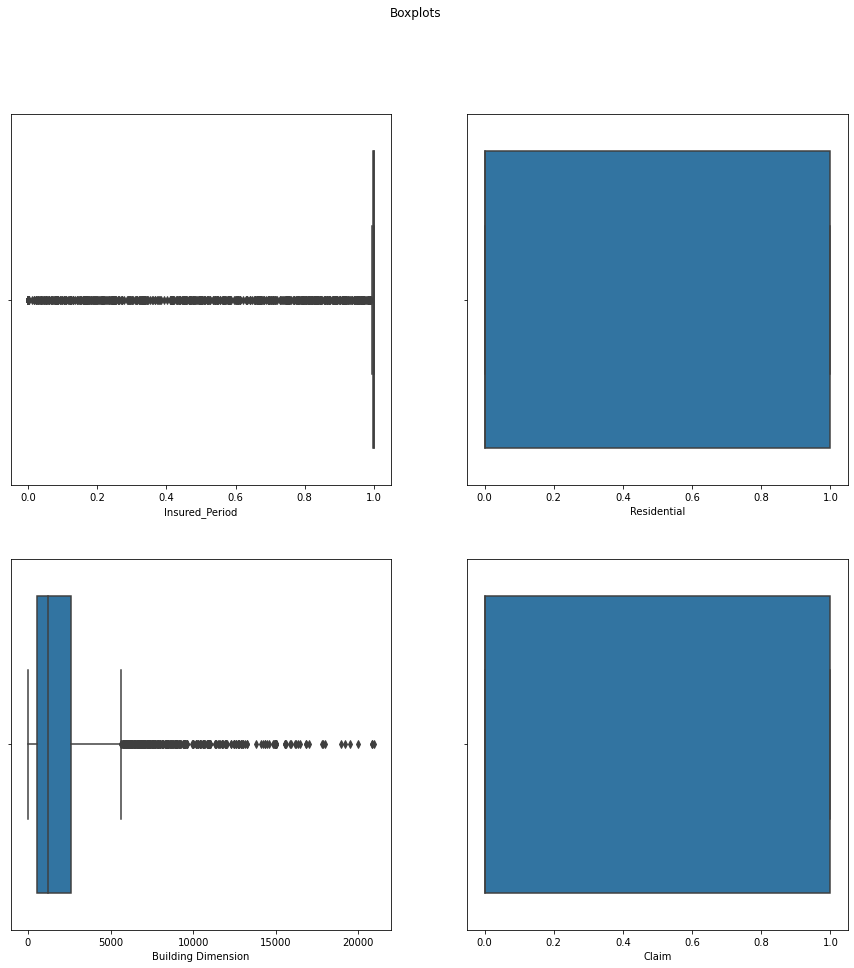

In [ ]:
#checking for outliers
#
# To check for outliers through boxplots
#

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 15))

fig.suptitle('Boxplots')
sns.boxplot(train_df1['Insured_Period'], ax=ax1)
sns.boxplot(train_df1['Residential'], ax=ax2)
sns.boxplot(train_df1['Building Dimension'], ax=ax3)
sns.boxplot(train_df1['Claim'], ax=ax4)

plt.show()

**observation**: insured period, building dimension and claim variables has outliers

In [ ]:
# Check for outliers through IQR Score

# we first get the interquantile range for each column
Q1 = train_df1.quantile(0.25)
Q3 = train_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Insured_Period           0.002732
Residential              1.000000
Building Dimension    2031.500000
Building_Type            1.000000
Claim                    1.000000
dtype: float64


In [ ]:
# We then get the outliers as follows:
# True means presence of outliers

(train_df1 < (Q1 - 1.5 * IQR)) |(train_df1 > (Q3 + 1.5 * IQR))

,Building Dimension,Building_Fenced,Building_Painted,Building_Type,Claim,Garden,Insured_Period,Residential,Settlement
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
7137,False,False,False,False,False,False,True,False,False
7139,False,False,False,False,False,False,True,False,False
7148,False,False,False,False,False,False,True,False,False
7151,False,False,False,False,False,False,True,False,False


In [ ]:
# We then filter out outliers and remain with valid values as follows

train_df2 = train_df1[~((train_df1 < (Q1 - 1.5 * IQR)) |(train_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
train_df2.shape

(3917, 9)

In [ ]:
#5.1f To remove white spaces in our columns
train_df2.columns.str.replace(" "," ")
#
#preview of the new dataset
train_df3= train_df2.copy()
print(train_df3.shape)
train_df3.head()

(3917, 9)


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Claim
0,1.0,0,N,V,V,U,290.0,1,0
1,1.0,0,V,N,O,R,490.0,1,0
2,1.0,0,N,V,V,U,595.0,1,0
3,1.0,0,V,V,V,U,2840.0,1,0
4,1.0,0,V,N,O,R,680.0,1,0


**Observation**: our clean train dataset has 3917 records and 9 variables

In [ ]:
#rechecking the datatypes
#
train_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3917 entries, 0 to 7130
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Insured_Period      3917 non-null   float64
 1   Residential         3917 non-null   int64  
 2   Building_Painted    3917 non-null   object 
 3   Building_Fenced     3917 non-null   object 
 4   Garden              3917 non-null   object 
 5   Settlement          3917 non-null   object 
 6   Building Dimension  3917 non-null   float64
 7   Building_Type       3917 non-null   int64  
 8   Claim               3917 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 306.0+ KB


In [ ]:
#converting the data to the correct datatype- float
#
train_df3[["Residential", "Building_Type"]]= train_df3[["Residential", "Building_Type" ]].astype('float')
#
#converting categorical variables to the correct datatype-category
#
train_df3[["Building_Painted", "Building_Fenced", "Garden", "Settlement" ]]= train_df3[["Building_Painted", "Building_Fenced", "Garden", "Settlement" ]].astype('category')
train_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3917 entries, 0 to 7130
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Insured_Period      3917 non-null   float64 
 1   Residential         3917 non-null   float64 
 2   Building_Painted    3917 non-null   category
 3   Building_Fenced     3917 non-null   category
 4   Garden              3917 non-null   category
 5   Settlement          3917 non-null   category
 6   Building Dimension  3917 non-null   float64 
 7   Building_Type       3917 non-null   float64 
 8   Claim               3917 non-null   int64   
dtypes: category(4), float64(4), int64(1)
memory usage: 199.3 KB


**observation**: dataset converted to the right datatypes

###Tidying test dataset

In [ ]:
#6.1a data cleaning for train_df dataset
#
#creating a copy of the dataset to be be used on cleaning process
#
test_df1=test_df.copy()

In [ ]:
#6.1a.Getting the irrelevant varaibles
#Dropping unnecesary customer id variable
test_df1.drop(['Customer Id','YearOfObservation', 'Geo_Code', 'Date_of_Occupancy'], axis=1, inplace=True)
test_df1.head()


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows
0,1.000000,0,V,N,O,R,300.0,1,3
1,0.997268,0,V,N,O,R,300.0,1,3
2,0.369863,0,V,V,V,U,790.0,1,.
3,1.000000,0,V,N,O,R,1405.0,1,3
4,1.000000,0,V,N,O,R,1405.0,1,3


In [ ]:
#6.1b Replacing the  . with missing values
#
test_df1.replace('   .',np.nan,inplace=True)
#
#checking the changes
#
test_df1.NumberOfWindows.unique()

array(['3', nan, '2', '4', '9', '5', '6', '8', '>=10', '7', '1'],
      dtype=object)

In [ ]:
#6.1b Check for missing values
#
test_df1.isnull().sum()

Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                   4
Settlement               0
Building Dimension      13
Building_Type            0
NumberOfWindows       2240
dtype: int64

**observations**: Garden, building dimension,date of occupancy, and Number of windows have missing values.

In [ ]:
#6.1c getting the percentage of missing data in each column
#
test_df1.isnull().sum()/len(test_df1)* 100 

Insured_Period         0.000000
Residential            0.000000
Building_Painted       0.000000
Building_Fenced        0.000000
Garden                 0.130336
Settlement             0.000000
Building Dimension     0.423591
Building_Type          0.000000
NumberOfWindows       72.987944
dtype: float64

In [ ]:
# dropping variables with high missing values
#as a role of thumb, drop any colunm with more than 25% of the missing data.
#
test_df1 = test_df1[test_df1.columns[test_df1.isnull().mean() < 0.25]]
test_df1.isnull().sum()

Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    13
Building_Type          0
dtype: int64

**observation**: Number of Windows variable was dropped. 

In [ ]:
#filling the missing values with zero
#
measured_col = ['Building Dimension']
test_df1[measured_col]=test_df1[measured_col].fillna(0)
#
#dropping any remaining missing values
drop_null= test_df1.dropna(inplace=True)
#
#confriming no missing values
test_df1.isnull().sum().any()

False

**observation**

* where the test were not taken/measured, there were null values. the entry should be zero thus we use fillna function
* Dropped missing value in garden variables since they were few and cannot affect our analysis.

In [ ]:
#6.1d Checking if there are duplicates
#
test_df1.duplicated().sum()

878

In [ ]:
# Dropping duplicates
test_df1.drop_duplicates(inplace=True)
#
#confirm no duplicates
#
test_df1.duplicated().any()

False

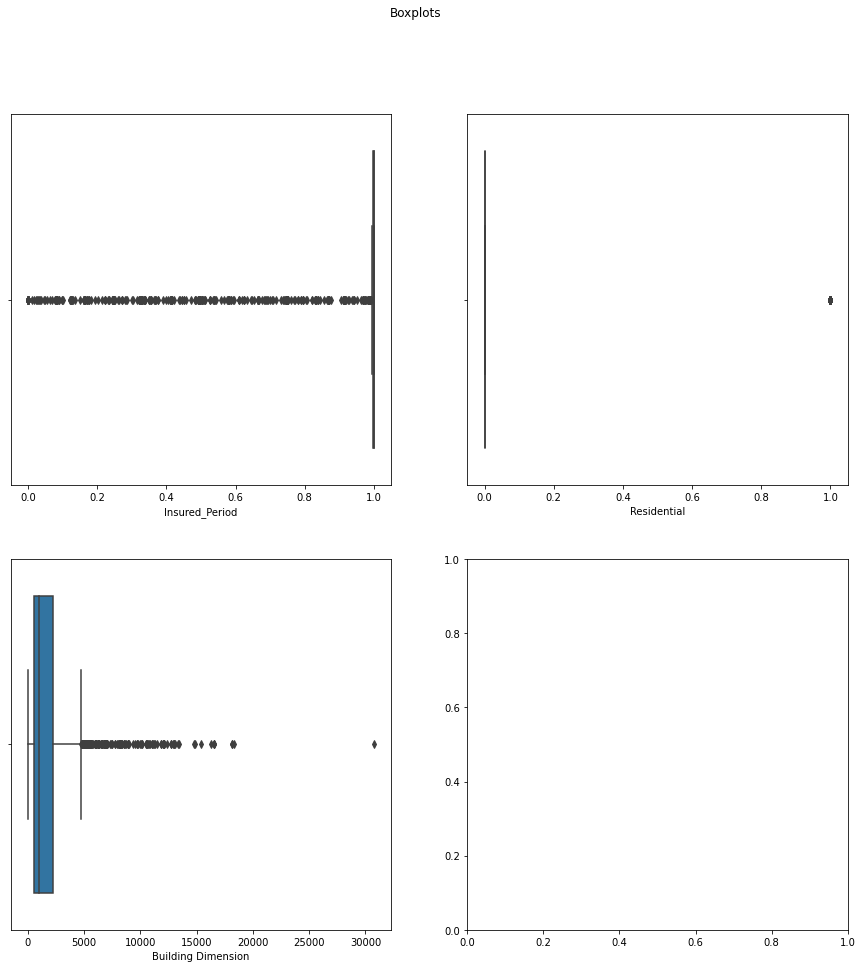

In [ ]:
#6.1e checking for outliers
#
# To check for outliers through boxplots
#

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 15))

fig.suptitle('Boxplots')
sns.boxplot(test_df1['Insured_Period'], ax=ax1)
sns.boxplot(test_df1['Residential'], ax=ax2)
sns.boxplot(test_df1['Building Dimension'], ax=ax3)

plt.show()


**observation**: insured period, building dimension and claim variables has outliers

In [ ]:
# Check for outliers through IQR Score

# we first get the interquantile range for each column
Q1 = test_df1.quantile(0.25)
Q3 = test_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Insured_Period           0.002732
Residential              0.000000
Building Dimension    1695.000000
Building_Type            1.000000
dtype: float64


In [ ]:
# We then get the outliers as follows:
# True means presence of outliers

(test_df1 < (Q1 - 1.5 * IQR)) |(test_df1 > (Q3 + 1.5 * IQR))

,Building Dimension,Building_Fenced,Building_Painted,Building_Type,Garden,Insured_Period,Residential,Settlement
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3056,False,False,False,False,False,False,False,False
3058,False,False,False,False,False,True,False,False
3059,False,False,False,False,False,False,False,False
3060,False,False,False,False,False,True,False,False


In [ ]:
# We then filter out outliers and remain with valid values as follows
test_df2 = test_df1[~((test_df1 < (Q1 - 1.5 * IQR)) |(test_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
test_df2.shape



(1215, 8)

In [ ]:
#6.1f To remove white spaces in our columns
test_df2.columns.str.replace(" "," ")
#
#preview of the new dataset
new_test_df= test_df2.copy()
print(new_test_df.shape)
new_test_df.head()

(1215, 8)


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type
0,1.000000,0,V,N,O,R,300.0,1
1,0.997268,0,V,N,O,R,300.0,1
3,1.000000,0,V,N,O,R,1405.0,1
5,1.000000,0,V,V,V,U,3225.0,2
7,1.000000,0,V,V,V,U,1400.0,2


**observation**: our new test dataset has 1215 records and 8 variables.

In [ ]:
#converting the data to the correct datatype- float
#
new_test_df[["Residential", "Building_Type"]]= new_test_df[["Residential", "Building_Type" ]].astype('float')
#converting categorical variables to the correct datatype-category
#
new_test_df[["Building_Painted", "Building_Fenced", "Garden", "Settlement" ]]= new_test_df[["Building_Painted", "Building_Fenced", "Garden", "Settlement" ]].astype('category')
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 0 to 3063
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Insured_Period      1215 non-null   float64 
 1   Residential         1215 non-null   float64 
 2   Building_Painted    1215 non-null   category
 3   Building_Fenced     1215 non-null   category
 4   Garden              1215 non-null   category
 5   Settlement          1215 non-null   category
 6   Building Dimension  1215 non-null   float64 
 7   Building_Type       1215 non-null   float64 
dtypes: category(4), float64(4)
memory usage: 52.6 KB


**observation**: our clean test dataset converted to the right datatypes

In [ ]:
#creating dummies for the categorical columns
#categorical colunms
columns=['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']
#
#getting the dummies
new_test_df= pd.get_dummies(test_df2, columns=columns, drop_first=True)
new_test_df.head()

,Insured_Period,Residential,Building Dimension,Building_Type,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
0,1.000000,0,300.0,1,1,0,0,0
1,0.997268,0,300.0,1,1,0,0,0
3,1.000000,0,1405.0,1,1,0,0,0
5,1.000000,0,3225.0,2,1,1,1,1
7,1.000000,0,1400.0,2,1,1,1,1


## 6. Exploratory Data Analysis

## 6a. Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.






In [ ]:
# preview of our dataset
#
train_df3.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Claim
0,1.0,0.0,N,V,V,U,290.0,1.0,0
1,1.0,0.0,V,N,O,R,490.0,1.0,0
2,1.0,0.0,N,V,V,U,595.0,1.0,0
3,1.0,0.0,V,V,V,U,2840.0,1.0,0
4,1.0,0.0,V,N,O,R,680.0,1.0,0


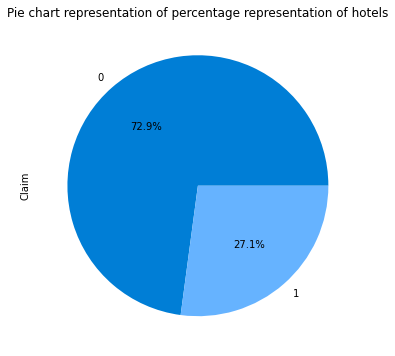

In [ ]:
#univariate analysis: claim variable piechart
#
colors = ['#007ED6','#66B3FF']
plt.figure(figsize = (6, 6))
train_df3.Claim.value_counts().plot(kind = 'pie',colors=colors, autopct = '%0.1f%%')
plt.title('Pie chart representation of percentage representation of hotels') 
plt.show()

**observation**:only 27.1% of the clients claimed insurance cover.

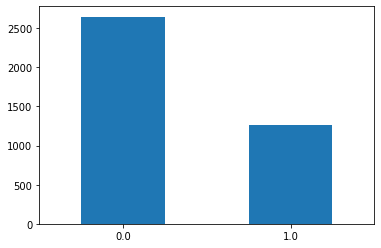

In [ ]:
# univariate analysis: Residential variable bar graph
train_df3.Residential.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

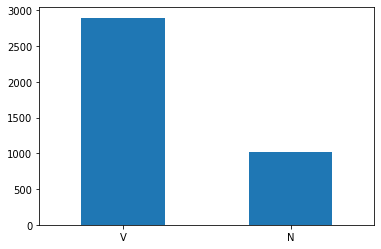

In [ ]:
# univariate analysis: Building_Painted variable bar graph
train_df3.Building_Painted.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

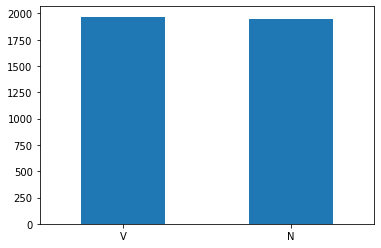

In [ ]:
# univariate analysis: Building_Fenced variable bar graph
train_df3.Building_Fenced.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

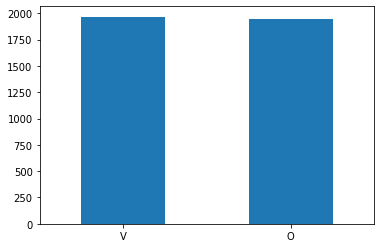

In [ ]:
# univariate analysis: Garden variable bar graph
train_df3.Garden.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

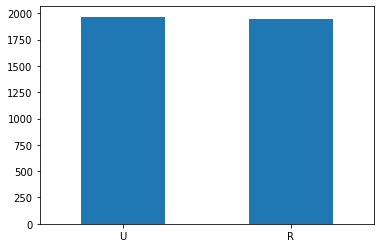

In [ ]:
# univariate analysis: Settlement variable bar graph
train_df3.Settlement.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

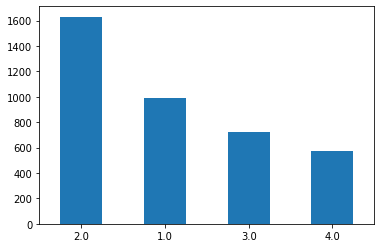

In [ ]:
# univariate analysis: Building_Type variable bar graph
train_df3.Building_Type.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

## 6b. Bivariate Analysis

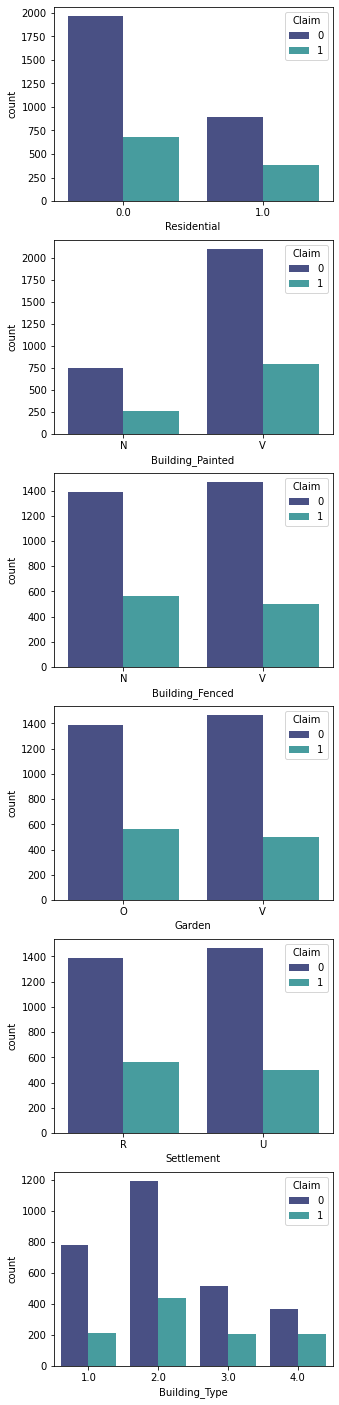

In [ ]:
#plotting the target variable against other features.
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')
f, axes = plt.subplots(6, 1, figsize=[5, 25])
sns.countplot('Residential', hue= 'Claim', data=train_df3, palette='mako', ax=axes[0])
sns.countplot('Building_Painted', hue= 'Claim', data=train_df3, palette='mako', ax=axes[1])
sns.countplot('Building_Fenced', hue= 'Claim', data=train_df3, palette='mako', ax=axes[2])
sns.countplot('Garden', hue= 'Claim', data=train_df3, palette='mako', ax=axes[3])
sns.countplot('Settlement', hue= 'Claim', data=train_df3, palette='mako', ax=axes[4])
sns.countplot('Building_Type', hue= 'Claim', data=train_df3, palette='mako', ax=axes[5])

In [ ]:
#Computing the correlation matrix 
 #
train_df3.corr()

,Insured_Period,Residential,Building Dimension,Building_Type,Claim
Insured_Period,1.000000,0.050795,-0.004091,0.019573,0.043979
Residential,0.050795,1.000000,-0.018305,0.329537,0.041651
Building Dimension,-0.004091,-0.018305,1.000000,-0.074564,0.202805
Building_Type,0.019573,0.329537,-0.074564,1.000000,0.095506
Claim,0.043979,0.041651,0.202805,0.095506,1.000000


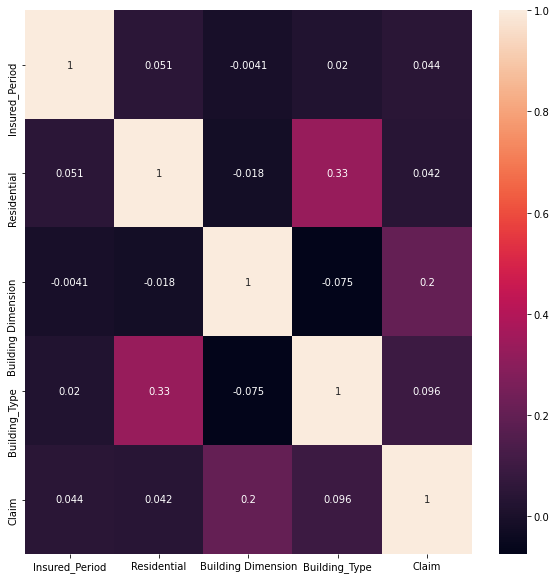

In [ ]:
# heatmap to visualise features with linear relationships 
# This is the association between numerical variables in the dataset
#
plt.subplots(figsize=(10,10))
sns.heatmap(train_df3.corr(),annot=True)

**observation**: 

* building time and residential are moderately correlated.
* building type and building dimension variables are strongly negatively correlated.


#Data Preprocessing

In [ ]:
#preview of the datset
train_df3.head()


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Claim
0,1.0,0.0,N,V,V,U,290.0,1.0,0
1,1.0,0.0,V,N,O,R,490.0,1.0,0
2,1.0,0.0,N,V,V,U,595.0,1.0,0
3,1.0,0.0,V,V,V,U,2840.0,1.0,0
4,1.0,0.0,V,N,O,R,680.0,1.0,0


In [ ]:
train_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3917 entries, 0 to 7130
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Insured_Period      3917 non-null   float64 
 1   Residential         3917 non-null   float64 
 2   Building_Painted    3917 non-null   category
 3   Building_Fenced     3917 non-null   category
 4   Garden              3917 non-null   category
 5   Settlement          3917 non-null   category
 6   Building Dimension  3917 non-null   float64 
 7   Building_Type       3917 non-null   float64 
 8   Claim               3917 non-null   int64   
dtypes: category(4), float64(4), int64(1)
memory usage: 359.3 KB


In [ ]:
#creating dummies for the categorical columns
#categorical colunms
columns=['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']
#
#getting the dummies
df_clean= pd.get_dummies(train_df3, columns=columns, drop_first=True)
df_clean.head()

,Insured_Period,Residential,Building Dimension,Building_Type,Claim,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
0,1.0,0.0,290.0,1.0,0,0,1,1,1
1,1.0,0.0,490.0,1.0,0,1,0,0,0
2,1.0,0.0,595.0,1.0,0,0,1,1,1
3,1.0,0.0,2840.0,1.0,0,1,1,1,1
4,1.0,0.0,680.0,1.0,0,1,0,0,0


**observations:** this is our final dataset with dummies.

**Feature importance selection**

In [ ]:
#dataset to be used for feature importance selection
#
fr_df=df_clean.copy()

In [ ]:
#feature selection
#
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into Input and Target Variable

y = fr_df[['Claim']]  # target variable 
X =fr_df.drop(columns=['Claim'], axis=1)  # input variables

In [ ]:
# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#creating model. creat regressor object and train it using train data
#
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state = 1)      
lr_baseline_model = clf_lr.fit(X_train,y_train)

In [ ]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= clf_lr , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [False False  True False False  True  True  True]
Feature Ranking: [3 5 1 2 4 1 1 1]


In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.iloc[:, 0:]),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')


,Feature,Ranking
2,Building Dimension,1
5,Building_Fenced_V,1
6,Garden_V,1
7,Settlement_U,1
3,Building_Type,2
0,Insured_Period,3
4,Building_Painted_V,4
1,Residential,5


In [ ]:
#1.dataset with all variables
#
df_clean.head()

,Insured_Period,Residential,Building Dimension,Building_Type,Claim,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
0,1.0,0.0,290.0,1.0,0,0,1,1,1
1,1.0,0.0,490.0,1.0,0,1,0,0,0
2,1.0,0.0,595.0,1.0,0,0,1,1,1
3,1.0,0.0,2840.0,1.0,0,1,1,1,1
4,1.0,0.0,680.0,1.0,0,1,0,0,0


In [ ]:
#2.dataframe for feautures selected plus target variable
#
feature_df = df_clean[['Insured_Period','Building Dimension','Building_Fenced_V','Garden_V', 'Claim']]
print(feature_df.shape)
feature_df.head()


(3917, 5)


,Insured_Period,Building Dimension,Building_Fenced_V,Garden_V,Claim
0,1.0,290.0,1,1,0
1,1.0,490.0,0,0,0
2,1.0,595.0,1,1,0
3,1.0,2840.0,1,1,0
4,1.0,680.0,0,0,0


## **Model building**

### Neural  with all the variables.

In [ ]:
#preview of the datasets to be used
#
neural1_df=df_clean.copy()
print(neural1_df.shape)
neural1_df.head()

(3917, 9)


,Insured_Period,Residential,Building Dimension,Building_Type,Claim,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
0,1.0,0.0,290.0,1.0,0,0,1,1,1
1,1.0,0.0,490.0,1.0,0,1,0,0,0
2,1.0,0.0,595.0,1.0,0,0,1,1,1
3,1.0,0.0,2840.0,1.0,0,1,1,1,1
4,1.0,0.0,680.0,1.0,0,1,0,0,0


**observation**: our dataset has 3917 records and 9 colunms. 

**step1**. 
* we split the dataset into our input features and the label we wish to predict
* The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [ ]:
#splitting the dateset into features and target variable.
#
X = neural1_df.drop(['Claim'], axis=1).values  # features/indepedent variables
Y = neural1_df['Claim'].values # target/depedent/label variable


**Step 2**: 

* Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [ ]:
#importing preprocessing library
#
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[1.        , 0.        , 0.05141844, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.08687943, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.10549645, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

**step 3:**

set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [ ]:
#importing the library to be used in spliting the data
#
from sklearn.model_selection import train_test_split

In [ ]:
#splitting the dataset into 70% training and 30% test 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3,random_state=10)

In [ ]:
#set aside some parts of our dataset for a validation set and a test set.
#
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2741, 8) (588, 8) (588, 8) (2741,) (588,) (588,)


**step 4.**
### Building and training our first neural network

* We will be using Keras to build our architecture.

* we will import the code from Keras that we will need to use:

In [ ]:
#installing tensorflow
#
!pip install tensorflow

In [ ]:
#import the code from Keras that we will need to use
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**We will be using the Sequential model**, 
* which means that we merely need to describe the layers above in sequence. 
* we will use neural network of three layers:

  * Hidden layer 1: 100 neurons, ReLU activation
  * Hidden layer 2: 100 neurons, ReLU activation
  * Hidden layer 3: 100 neurons, ReLU activation
  * Output Layer: 1 neuron, Sigmoid activation

###1. Initial model

In [ ]:
#we use squential model with allows to build a model layer by layer.
#
model = tf.keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(8,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
     layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

**Configuring the model**


Before we start our training, we have to configure the model by

 * the algorithm to use to do the optimization (we'll use stochastic gradient descent)
 * The loss function to use (for binary classification, we will use binary cross entropy)
 * The other metrics to track apart from the loss function (we want to track accuracy as well)

In [ ]:
#configuring the model; 
#
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Training the model**


The function is called 'fit' as we are fitting the parameters to the data. We specify:

* what data we are training on, which is X_train and Y_train
* the size of our mini-batch
* how long we want to train it for (epochs)
* what our validation data is so that the model will tell us how we are doing on the validation data at each point.

In [ ]:
# training the model and saving output under the variable hist
#
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
86/86 [==============================] - 1s 4ms/step - loss: 0.6457 - accuracy: 0.7319 - val_loss: 0.6030 - val_accuracy: 0.7177
Epoch 2/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7546 - val_loss: 0.5939 - val_accuracy: 0.7177
Epoch 3/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7267 - val_loss: 0.5928 - val_accuracy: 0.7177
Epoch 4/20
86/86 [==============================] - 1s 7ms/step - loss: 0.5919 - accuracy: 0.7213 - val_loss: 0.5927 - val_accuracy: 0.7177
Epoch 5/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7311 - val_loss: 0.5922 - val_accuracy: 0.7177
Epoch 6/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7216 - val_loss: 0.5917 - val_accuracy: 0.7177
Epoch 7/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7467 - val_loss: 0.5908 - val_accuracy: 0.7177
Epoch 8/20
86/86 [==

**Evaluating our data on the test set:**

In [ ]:
#model evaluation
#
model.evaluate(X_test,Y_test)[1]

19/19 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.7262


0.726190447807312

**observation**: we get 70.4% accuracy before ading regularization.

**Visualizing Loss and Accuracy**

In [ ]:
#importing the relevant package.
#
import matplotlib.pyplot as plt
#
# visualizing the training loss and the validation loss.
#
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

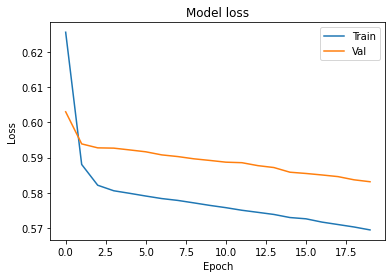

In [ ]:
#visualizing the loss
#
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**observation**: 
* both validated loss and train loss decreases sharply at first and then slowly as epoch increases.

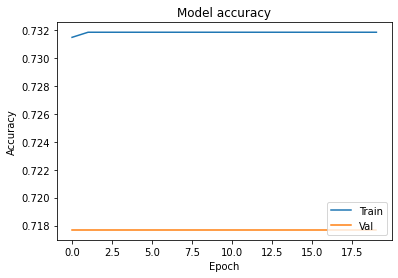

In [ ]:
#visualizing the training accuracy and the validation accuracy.
#
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**observarion:** 
* accuracy for train data increases sharply and then does not change even if the epoch increases.
* validated accuracy doesn't change even if the epoch increases.

### **model 2**

**overfitting the model**

We'll train a model which will overfit, which we increase the number of layers and neuron size without reguralization.

In [ ]:
# we will increase the number of layers and neuron to see how it behaves
#
model_2 = tf.keras.Sequential([
    layers.Dense(1000, activation='relu', input_shape=(8,)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
86/86 [==============================] - 4s 39ms/step - loss: 0.5980 - accuracy: 0.7427 - val_loss: 0.6011 - val_accuracy: 0.7177
Epoch 2/100
86/86 [==============================] - 3s 38ms/step - loss: 0.5520 - accuracy: 0.7411 - val_loss: 0.6089 - val_accuracy: 0.7177
Epoch 3/100
86/86 [==============================] - 3s 38ms/step - loss: 0.5505 - accuracy: 0.7371 - val_loss: 0.5718 - val_accuracy: 0.7177
Epoch 4/100
86/86 [==============================] - 3s 38ms/step - loss: 0.5621 - accuracy: 0.7258 - val_loss: 0.5793 - val_accuracy: 0.7143
Epoch 5/100
86/86 [==============================] - 3s 38ms/step - loss: 0.5571 - accuracy: 0.7313 - val_loss: 0.5722 - val_accuracy: 0.7177
Epoch 6/100
86/86 [==============================] - 3s 38ms/step - loss: 0.5531 - accuracy: 0.7350 - val_loss: 0.5849 - val_accuracy: 0.7160
Epoch 7/100
86/86 [==============================] - 3s 37ms/step - loss: 0.5656 - accuracy: 0.7257 - val_loss: 0.5674 - val_accuracy: 0.7177
Epoch 

In [ ]:
model_2.evaluate(X_test,Y_test)[1]

19/19 [==============================] - 0s 7ms/step - loss: 0.6102 - accuracy: 0.7381


0.738095223903656

**observation :** the model gave 73.8% acuracy.

**visualization to see what overfitting looks like in terms of the loss and accuracy.**

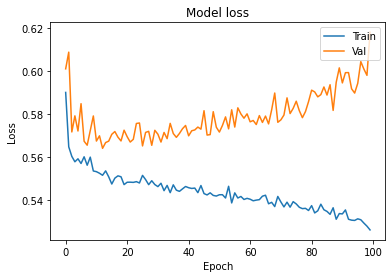

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

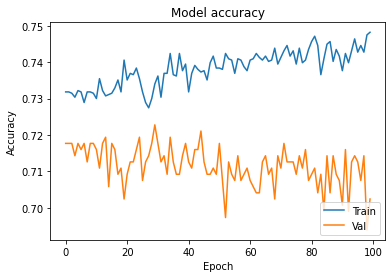

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**observation** 
the above shows that our model is overfit since many 
layers makes it hard for the model to learn.

### **Hyperparameter tuning**

* finding the best batch size and epoch.

In [ ]:
#importing the relevant libraries
#
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy


In [ ]:
def build_ann(optimizer):
    model = Sequential()
    model.add(Dense(units = 100, kernel_initializer = 'uniform',   activation = 'relu', input_dim =8))
    model.add(Dense(units= 100, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
'''# getting the best batch size and epoch for the model
#
#model=KerasClassifier(build_fn=build_ann)
#parameters={'batch_size':[10,32],
           'epochs':[20,200],
           'optimizer':['adam','rmsprop']}
#grid_search=GridSearchCV(estimator= model,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10)
#grid_search=grid_search.fit(X_train, Y_train)
,,,

SyntaxError: ignored

In [ ]:
#getting the best params
#
best_parameters=grid_search.best_params_

###**Model_3**

To address the overfitting we see in Model 2, we'll incorporate L2 regularization, optimal epoch, and batch size. and dropout in our third model here (Model 3)

In [ ]:
model_3 = tf.keras.Sequential([
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(8,)),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.001)),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=40,
          validation_data=(X_val, Y_val))

Epoch 1/40
86/86 [==============================] - 3s 38ms/step - loss: 0.4997 - accuracy: 0.7585 - val_loss: 0.7980 - val_accuracy: 0.7126
Epoch 2/40
86/86 [==============================] - 3s 36ms/step - loss: 0.5041 - accuracy: 0.7585 - val_loss: 0.7299 - val_accuracy: 0.6990
Epoch 3/40
86/86 [==============================] - 3s 33ms/step - loss: 0.5072 - accuracy: 0.7570 - val_loss: 0.7196 - val_accuracy: 0.7058
Epoch 4/40
86/86 [==============================] - 3s 32ms/step - loss: 0.5058 - accuracy: 0.7574 - val_loss: 0.7128 - val_accuracy: 0.6956
Epoch 5/40
86/86 [==============================] - 3s 35ms/step - loss: 0.5016 - accuracy: 0.7603 - val_loss: 0.7534 - val_accuracy: 0.6956
Epoch 6/40
86/86 [==============================] - 3s 37ms/step - loss: 0.5024 - accuracy: 0.7574 - val_loss: 0.7532 - val_accuracy: 0.7058
Epoch 7/40
86/86 [==============================] - 3s 37ms/step - loss: 0.4977 - accuracy: 0.7548 - val_loss: 0.7919 - val_accuracy: 0.6922
Epoch 8/40
86

In [ ]:
model_3.evaluate(X_test,Y_test)[1]

19/19 [==============================] - 0s 1ms/step - loss: 0.9937 - accuracy: 0.7280


0.7227891087532043

**observation**: the model gave 72% accuracy after tuning. 

**Visualizing Loss and Accuracy**

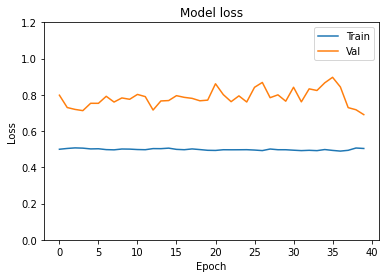

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0.0)
plt.show()

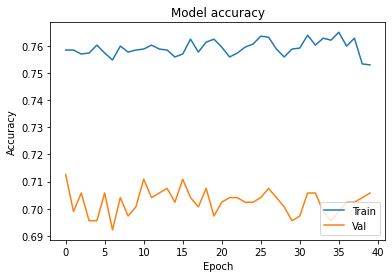

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

observation:

* notice that the loss is a low, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

* when we compare mode 3 to Model 2, you should see that there's less overfitting in model 3.

##Neural Network  model with the best features that was selected feature importance 

In [ ]:
#preview of the dataset to be used
#
neural2_df=feature_df.copy()
print(neural2_df.shape)
neural2_df.head()

(3917, 5)


,Insured_Period,Building Dimension,Building_Fenced_V,Garden_V,Claim
0,1.0,290.0,1,1,0
1,1.0,490.0,0,0,0
2,1.0,595.0,1,1,0
3,1.0,2840.0,1,1,0
4,1.0,680.0,0,0,0


**observation**: our dataset has 3917 records and 5 variables.

**step a**. 
* we split the dataset into our input features and the label we wish to predict
* The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [ ]:
#splitting the dateset into features and target variable.
#
X = neural2_df.drop(['Claim'], axis=1).values  # features/indepedent variables
Y = neural2_df['Claim'].values # target/depedent/label variable

**Step b**: 

* Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [ ]:
#importing preprocessing library
#
from sklearn import preprocessing
#
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
#checking the scaled values
#
X_scale

array([[1.        , 0.05141844, 1.        , 1.        ],
       [1.        , 0.08687943, 0.        , 0.        ],
       [1.        , 0.10549645, 1.        , 1.        ],
       ...,
       [1.        , 0.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        ]])

**step 3:**

set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that

In [ ]:
#importing the library to be used in spliting the data
#
from sklearn.model_selection import train_test_split
#
#splitting the dataset into 70% training and 30% test 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#
#set aside some parts of our dataset for a validation set and a test set.
#
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
#
#checking the shape
#
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2741, 4) (588, 4) (588, 4) (2741,) (588,) (588,)


### Model A

In [ ]:
#we use squential model with allows to build a model layer by layer.
#
model_a = tf.keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(4,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
     layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

**Configuring the model a**

Before we start our training, we have to configure the model by

* the algorithm to use to do the optimization (we'll use stochastic gradient descent)
* The loss function to use (for binary classification, we will use binary cross entropy)
* The other metrics to track apart from the loss function (we want to track accuracy as well)

In [ ]:
#configuring the model; 
#
model_a.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Training the model**


The function is called 'fit' as we are fitting the parameters to the data. We specify:

* what data we are training on, which is X_train and Y_train
* the size of our mini-batch
* how long we want to train it for (epochs)
* what our validation data is so that the model will tell us how we are doing on the validation data at each point.

In [ ]:
# training the model and saving output under the variable hist
#
hist_a = model_a.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
86/86 [==============================] - 1s 4ms/step - loss: 0.6639 - accuracy: 0.7190 - val_loss: 0.6250 - val_accuracy: 0.7092
Epoch 2/20
86/86 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7242 - val_loss: 0.6080 - val_accuracy: 0.7092
Epoch 3/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7297 - val_loss: 0.6050 - val_accuracy: 0.7092
Epoch 4/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7305 - val_loss: 0.6045 - val_accuracy: 0.7092
Epoch 5/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7325 - val_loss: 0.6041 - val_accuracy: 0.7092
Epoch 6/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7249 - val_loss: 0.6038 - val_accuracy: 0.7092
Epoch 7/20
86/86 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7221 - val_loss: 0.6036 - val_accuracy: 0.7092
Epoch 8/20
86/86 [==

**Evaluating our data on the test set:**

In [ ]:
#model evaluation
#
model_a.evaluate(X_test,Y_test)[1]

19/19 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.7653


0.7653061151504517

**observation**: the model gives 76% accuracy before tuning.

**Visualizing Loss and Accuracy**

In [ ]:
#importing the relevant package.
#
import matplotlib.pyplot as plt
#
# visualizing the training loss and the validation loss.
#
hist_a.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

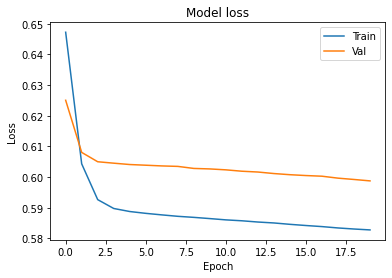

In [ ]:
#visualizing the loss
#
plt.plot(hist_a.history['loss'])
plt.plot(hist_a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**observation**: 
* both validated loss and train loss decreases sharply at first and then slowly as epoch increases.

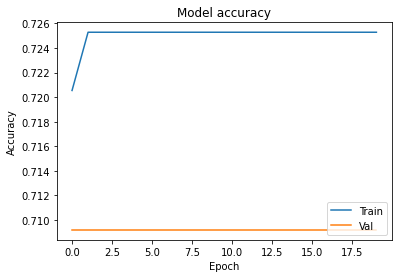

In [ ]:
#visualizing the training accuracy and the validation accuracy.
#
plt.plot(hist_a.history['accuracy'])
plt.plot(hist_a.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**observation**: 
* train accuracy increases sharply upto a certain point and then remains stagnant with and increase in epoch.
* validation remains the same as an epoch increases.

### **model b**

**overfitting the model**

We'll train a model which will overfit, which we increase the number of layers and neuron size without reguralization.

In [ ]:
# we will increase the number of layers and neuron to see how it behaves
#
model_b = tf.keras.Sequential([
    layers.Dense(1000, activation='relu', input_shape=(4,)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model_b.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_b = model_b.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
86/86 [==============================] - 4s 42ms/step - loss: 0.6023 - accuracy: 0.7045 - val_loss: 0.5934 - val_accuracy: 0.7092
Epoch 2/100
86/86 [==============================] - 3s 37ms/step - loss: 0.5826 - accuracy: 0.7170 - val_loss: 0.5884 - val_accuracy: 0.7092
Epoch 3/100
86/86 [==============================] - 3s 37ms/step - loss: 0.5897 - accuracy: 0.7150 - val_loss: 0.5873 - val_accuracy: 0.7092
Epoch 4/100
86/86 [==============================] - 3s 37ms/step - loss: 0.5897 - accuracy: 0.7162 - val_loss: 0.5893 - val_accuracy: 0.7092
Epoch 5/100
86/86 [==============================] - 3s 35ms/step - loss: 0.5770 - accuracy: 0.7174 - val_loss: 0.5853 - val_accuracy: 0.7092
Epoch 6/100
86/86 [==============================] - 3s 37ms/step - loss: 0.5715 - accuracy: 0.7227 - val_loss: 0.5950 - val_accuracy: 0.7092
Epoch 7/100
86/86 [==============================] - 3s 37ms/step - loss: 0.5782 - accuracy: 0.7135 - val_loss: 0.5819 - val_accuracy: 0.7092
Epoch 

In [ ]:
#model evaluation
#
model_b.evaluate(X_test,Y_test)[1]

19/19 [==============================] - 0s 6ms/step - loss: 0.5292 - accuracy: 0.7619


0.761904776096344

**observation** accuracy increases to 76.2%

**visualization** to see what overfitting looks like in terms of the loss and accuracy.

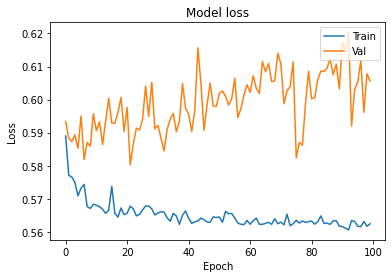

In [ ]:
plt.plot(hist_b.history['loss'])
plt.plot(hist_b.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

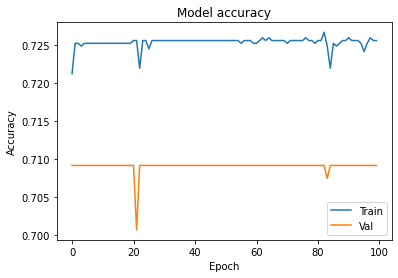

In [ ]:
plt.plot(hist_b.history['accuracy'])
plt.plot(hist_b.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**observation** 
the above shows that our model is overfit since many 
layers makes it hard for the model to learn.

### Adding Regularization to our Neural Network

* finding the best batch size and epoch.

In [ ]:
#importing the relevant libraries
#
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy

In [ ]:
#defining the function
#
def build_ann(optimizer):
    model = Sequential()
    model.add(Dense(units = 100, kernel_initializer = 'uniform',   activation = 'relu', input_dim =4))
    model.add(Dense(units= 100, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
''''
# getting the best batch size and epoch for the model
#
model=KerasClassifier(build_fn=build_ann)
parameters={'batch_size':[10,32],
           'epochs':[20,100],
           'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator= model,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10)
grid_search=grid_search.fit(X_train, Y_train)
'''''

###**Model c**

To address the overfitting we see in Model 2, we'll incorporate L2 regularization, optimal epoch, and batch size. and dropout in our third model here (Model 3)

In [ ]:
model_c = tf.keras.Sequential([
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(4,)),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.001)),
])
model_c.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_c = model_c.fit(X_train, Y_train,
          batch_size=32, epochs=40,
          validation_data=(X_val, Y_val))

Epoch 1/40
86/86 [==============================] - 1s 5ms/step - loss: 0.8837 - accuracy: 0.7146 - val_loss: 0.7657 - val_accuracy: 0.7092
Epoch 2/40
86/86 [==============================] - 0s 3ms/step - loss: 0.7431 - accuracy: 0.7255 - val_loss: 0.7066 - val_accuracy: 0.7092
Epoch 3/40
86/86 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.7328 - val_loss: 0.6700 - val_accuracy: 0.7092
Epoch 4/40
86/86 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.7229 - val_loss: 0.6500 - val_accuracy: 0.7092
Epoch 5/40
86/86 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.7255 - val_loss: 0.6443 - val_accuracy: 0.7092
Epoch 6/40
86/86 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.7306 - val_loss: 0.6290 - val_accuracy: 0.7092
Epoch 7/40
86/86 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.7309 - val_loss: 0.6215 - val_accuracy: 0.7092
Epoch 8/40
86/86 [==

In [ ]:
#model evaluation
#
model_c.evaluate(X_test,Y_test)

19/19 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.7653


[0.5385090112686157, 0.7653061151504517]

**observation**: the model accuracy improved after tuning to 76.5%

**Visualizing Loss and Accuracy**

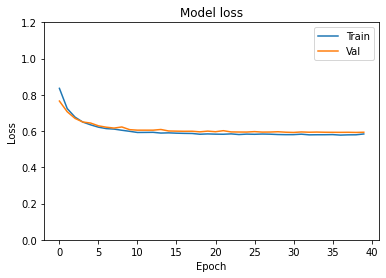

In [ ]:
plt.plot(hist_c.history['loss'])
plt.plot(hist_c.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0.0)
plt.show()

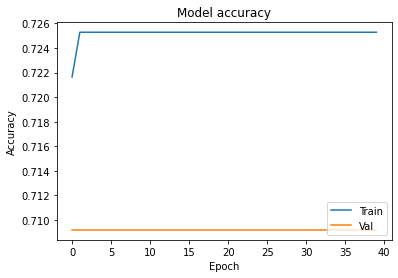

In [ ]:
plt.plot(hist_c.history['accuracy'])
plt.plot(hist_c.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**observation**: this is the best model since there is no overfitting. 

### conclusion

The best model to be used to predict whether insurance claim will be paid or not is the one with 4 features and is with the follwing tuning.
1. 3 hidden layers
2. neurons =100 for hidden layers and 1 for output layer.
3. activation: relu for hidden layers and sigmoid for output layer.
2. regularizers.l2 =0.001
3. optimizer= adam
4. loss= binary_crossentropy
5. batch size= 32
6. epoch = 40

## Follow up questions

1. Did we have the right data?

* Yes

2. Do we need other data to answer our question?

* No

3. we need more data to do away with overfitting.
* yes.

4. Did we have the right question?

* yes.